In [1]:
! pwd

/home/ne25/Documents


In [2]:
import mdtraj

In [3]:
# !pip install --user prody

In [4]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyemma
import mdtraj
import scipy.spatial.distance as sdist
import numpy as np
import prody
import itertools

In [9]:
#List simulation files
data=[]
param_files=glob.glob('/home/ne25/Downloads/Box_electrostatics_updated/Box_electrostatics/*param')
for param_file in param_files:
    #Add parameters
    with open(param_file) as param:
        values={}
        for line in param:
            if len(line)==0:
                continue
            line=line.strip().split(',')
            key=line[0]
            value=line[1]
            if key=='':
                continue
            values.update({key:value})
            root='.'.join(param_file.split('.')[:-1])
            values.update({'root':root})
    #Add files
    for extension in ['param','cif','pdb','dcd','log']:
        file_name=f'{root}.{extension}'
        if os.path.exists(file_name):
            values.update({extension:file_name})
    data+=[values]
    
simulations=pd.DataFrame(data)

simulations=simulations.reindex()
simulations=simulations.reset_index(drop=True)
simulations=simulations.sort_values('root')
simulations

,epsilon_ABP,root,epsilon_CAM,aligned,actinLen,repetition,disorder,box_size,n_actins,n_FAS,...,SLURM_WORKING_CLUSTER,SLURM_JOB_GID,test_run,date,name,job_id,param,cif,dcd,log
0,100,/home/ne25/Downloads/Box_electrostatics_update...,100,True,100,0,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_06_30,Simulations_scratch/Box_electrostatics/Boxv1_0...,0,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
1,100,/home/ne25/Downloads/Box_electrostatics_update...,100,True,100,1,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_01,Simulations_scratch/Box_electrostatics/Boxv1_0...,1,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
5,100,/home/ne25/Downloads/Box_electrostatics_update...,100,True,100,2,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_01,Simulations_scratch/Box_electrostatics/Boxv1_0...,2,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
3,100,/home/ne25/Downloads/Box_electrostatics_update...,100,False,100,0,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_01,Simulations_scratch/Box_electrostatics/Boxv1_0...,3,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
4,100,/home/ne25/Downloads/Box_electrostatics_update...,100,False,100,1,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_03,Simulations_scratch/Box_electrostatics/Boxv1_0...,4,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
2,100,/home/ne25/Downloads/Box_electrostatics_update...,100,False,100,2,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_03,Simulations_scratch/Box_electrostatics/Boxv1_0...,5,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...


@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 22160 atoms and 1 coordinate set(s) were parsed in 0.24s.
@> DCD file contains 10324 coordinate sets for 22160 atoms.
@> DCD file was parsed in 0.20 seconds.
@> 2618.41 MB parsed at input rate 12865.19 MB/s.
@> 10324 coordinate sets parsed at input rate 50725 frame/s.


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020


@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 22160 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> DCD file contains 10662 coordinate sets for 22160 atoms.
@> DCD file was parsed in 0.21 seconds.
@> 2704.14 MB parsed at input rate 12803.14 MB/s.
@> 10662 coordinate sets parsed at input rate 50480 frame/s.


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060


@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 22160 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> DCD file contains 10649 coordinate sets for 22160 atoms.
@> DCD file was parsed in 0.22 seconds.
@> 2700.84 MB parsed at input rate 12180.02 MB/s.
@> 10649 coordinate sets parsed at input rate 48023 frame/s.


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060


@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 22160 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> DCD file contains 10665 coordinate sets for 22160 atoms.
@> DCD file was parsed in 0.23 seconds.
@> 2704.90 MB parsed at input rate 11841.01 MB/s.
@> 10665 coordinate sets parsed at input rate 46687 frame/s.


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060


@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 22160 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> DCD file contains 10676 coordinate sets for 22160 atoms.
@> DCD file was parsed in 122.44 seconds.
@> 2707.69 MB parsed at input rate 22.11 MB/s.
@> 10676 coordinate sets parsed at input rate 87 frame/s.


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060


@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 22160 atoms and 1 coordinate set(s) were parsed in 0.30s.
@> DCD file contains 10567 coordinate sets for 22160 atoms.
@> DCD file was parsed in 31.48 seconds.
@> 2680.04 MB parsed at input rate 85.13 MB/s.
@> 10567 coordinate sets parsed at input rate 335 frame/s.


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040


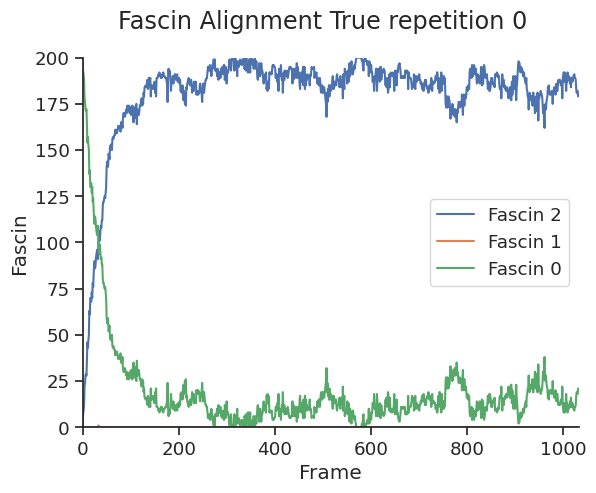

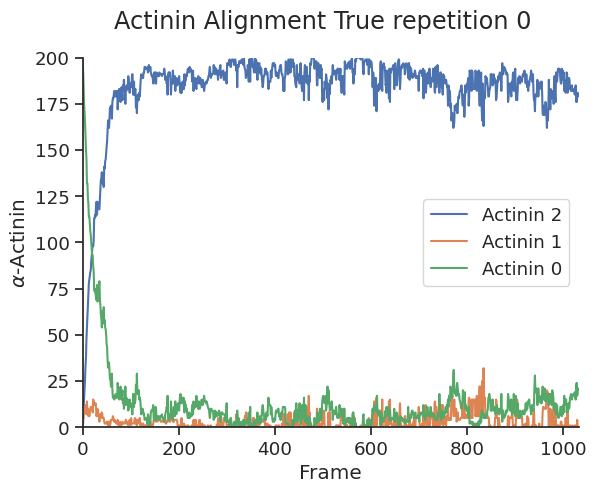

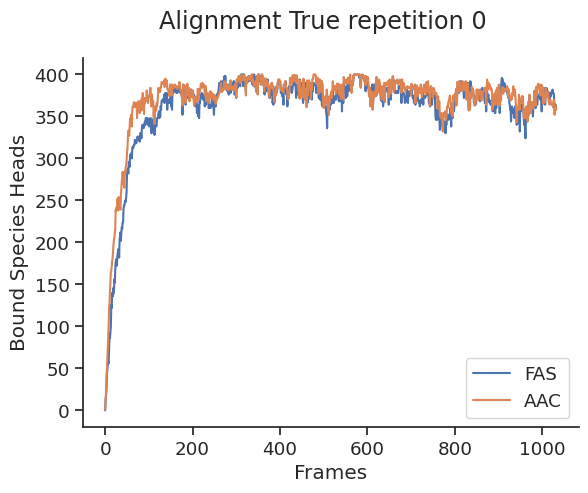

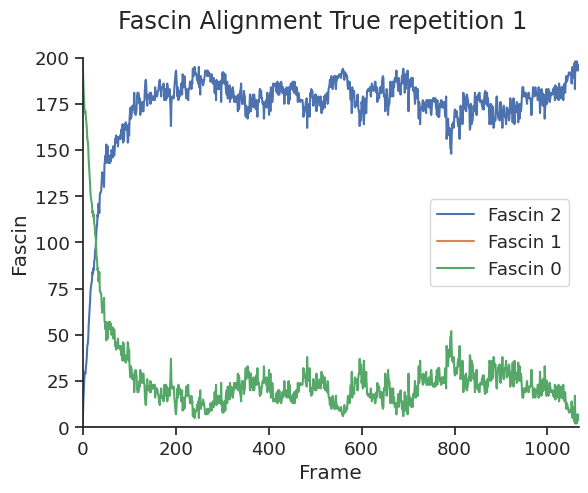

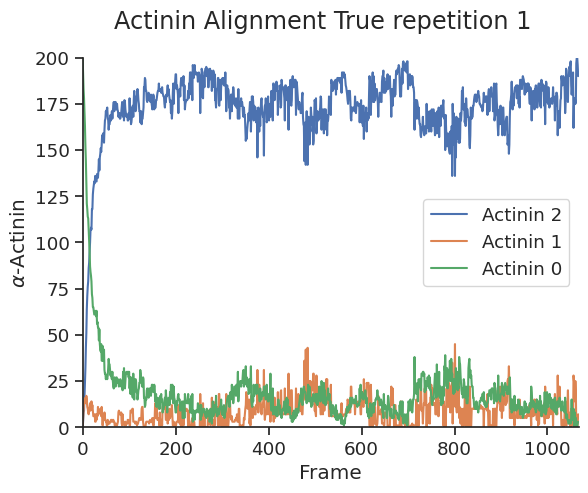

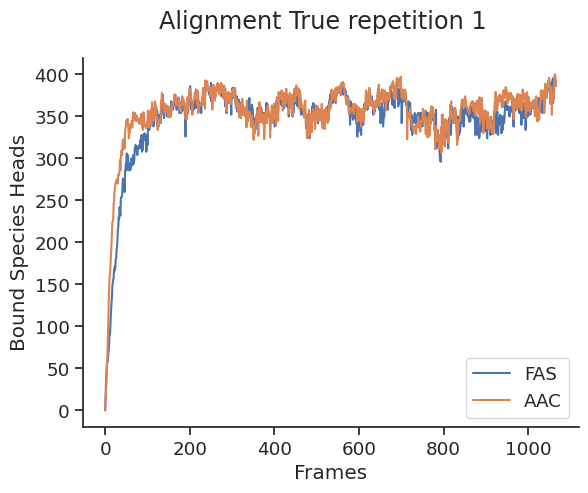

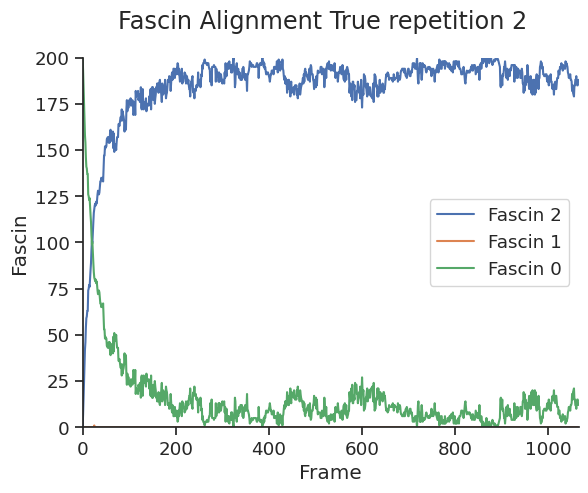

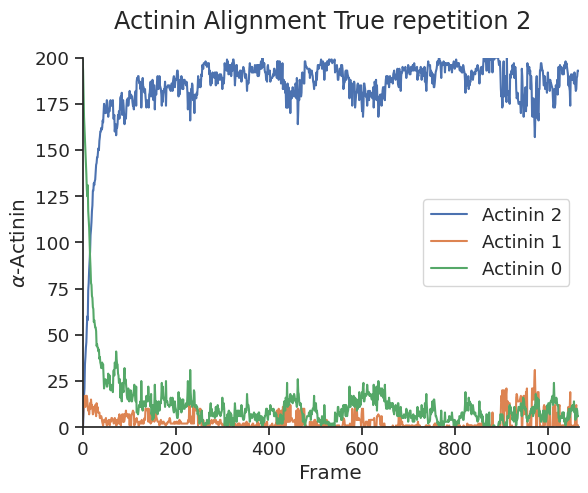

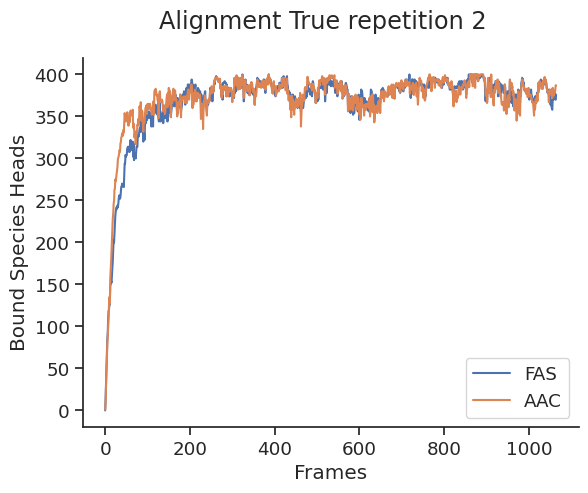

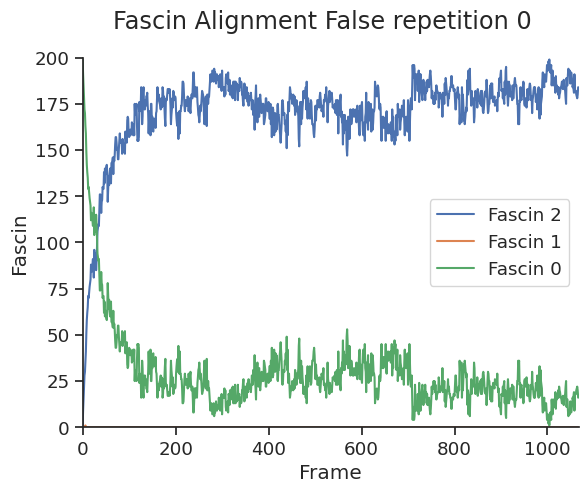

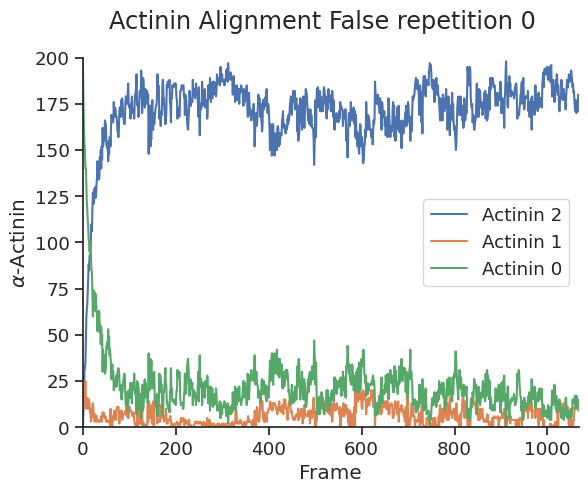

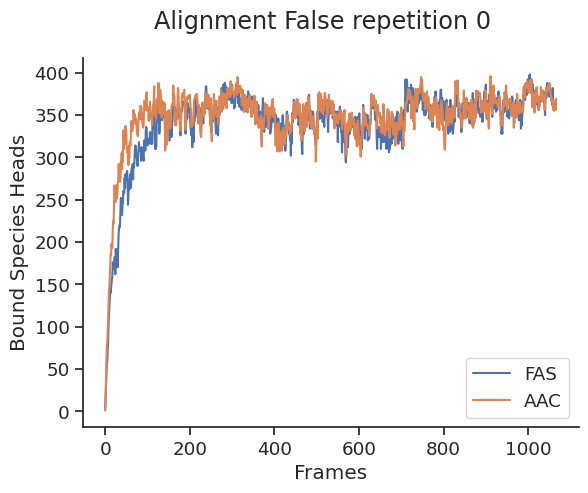

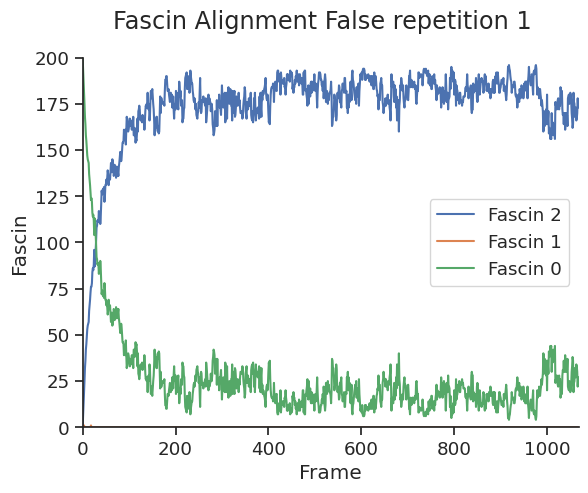

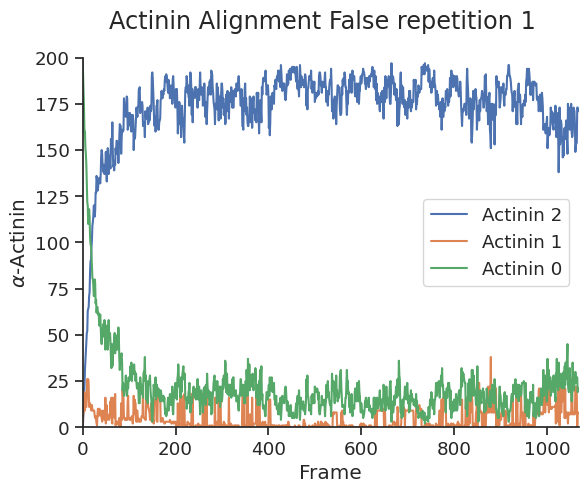

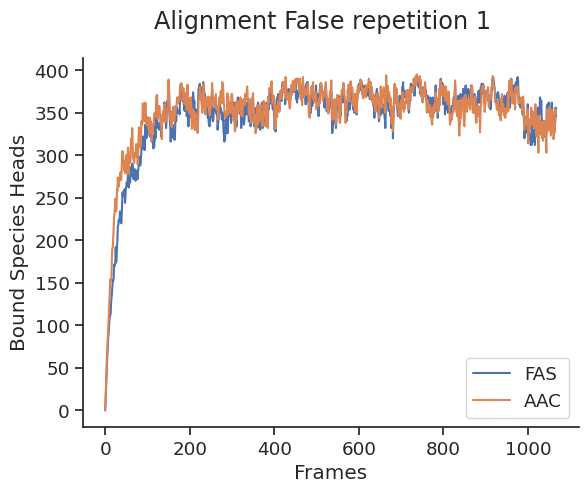

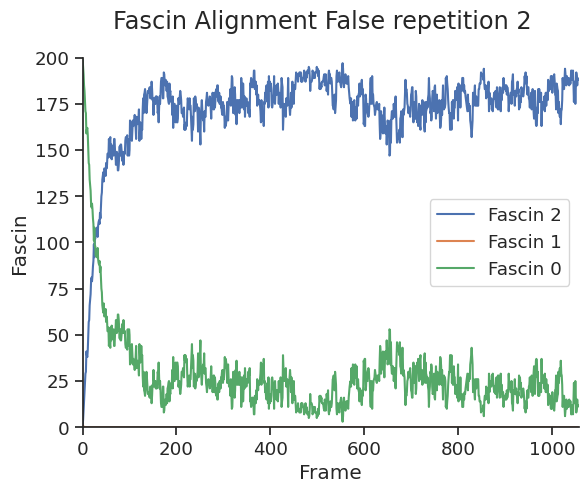

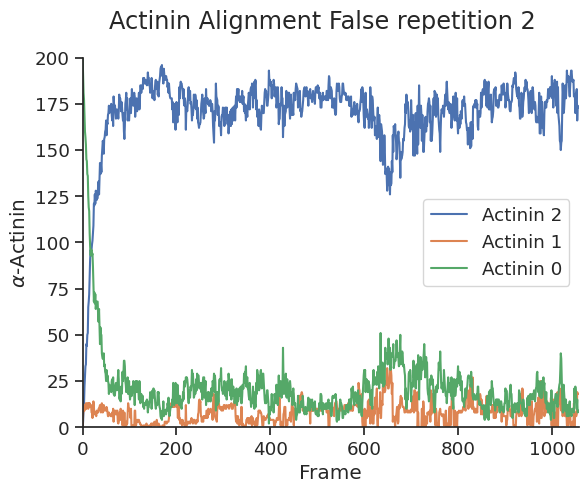

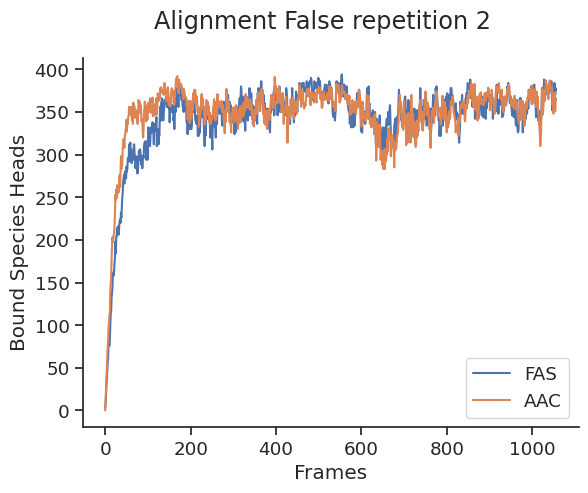

In [15]:
stride=1
data={}
sns.set(style='ticks',font_scale=1.2)

for i,simulation in simulations.iterrows():
    
    selected_simulation=simulation

    root=selected_simulation['root']
    dcd=selected_simulation['dcd']
    cif=selected_simulation['cif']

    cif=prody.parseMMCIF(selected_simulation['cif'])
    dcd=prody.parseDCD(selected_simulation['dcd'],step=10)
    dcd.setAtoms(cif) 
    dcd.getCoordsets().shape
    n_frames , n_particles, xyz = dcd.getCoordsets().shape
    coords=dcd.getCoordsets()
    coords.shape
    coords.reshape(-1,3).shape
    
    df=pd.DataFrame(coords.reshape(-1,3),columns=['x','y','z'])
    df['frame'] = np.repeat(np.arange(n_frames), n_particles)

    particles , frames = np.meshgrid(np.arange(n_particles), np.arange(n_frames))
    # Flatten the arrays to get the combinations
    frames = frames.flatten()
    particles = particles.flatten()

    df['frame'] = frames
    df['particle']=particles

    df['names']=np.tile(cif.getNames(),n_frames)
    df['residue_names']=np.tile(cif.getResnames(),n_frames)
    df['chain_id']=np.tile(cif.getChids(),n_frames)
    df['atom_element']=np.tile(cif.getElements(),n_frames)

    # Group the data by frame and perform computations for each frame
    grouped_frames = df.groupby('frame')

    df['actin_filter'] = df['residue_names'].isin(['ACD', 'ACT']) & df['names'].isin(['Aa', 'Ab', 'Ac'])
    df['fascin_filter'] = df['residue_names'].isin(['FAS']) & df['names'].isin(['Ca', 'Cb', 'Cd'])
    df['aac_filter'] = df['residue_names'].isin(['AAC']) & df['names'].isin(['Ca', 'Cb', 'Cd'])
    connected_fascin_counts = []
    connected_aac_counts = []

    fascin_binding_data=[]
    actinin_binding_data=[]

    # Group the data by frame and perform computations for each frame
    for frame_num, frame_group in df.groupby('frame'):
        if frame_num % 20 == 0:
            print(frame_num)
        # if frame_num %100 != 0:
        #     continue
        actin_group = frame_group[frame_group['actin_filter']]
        fascin_group = frame_group[frame_group['fascin_filter']]
        aac_group = frame_group[frame_group['aac_filter']]
        #aac_group = aac_data[aac_data['frame'] == frame_num]

        xyz1 = actin_group[['x', 'y', 'z']].values
        xyz2 = fascin_group[['x', 'y', 'z']].values
        xyz3 = aac_group[['x','y','z']].values

        distance = sdist.cdist(xyz1, xyz2) 
        new_shape = (distance.shape[0] // 3, distance.shape[1] // 3)
        reshaped_matrix = distance.reshape(new_shape[0], 3, new_shape[1], 3)
        averaged_distance = reshaped_matrix.mean(axis=(1, 3))
        number_connected_fascin = sum(np.any(averaged_distance < 50, axis=0))
        connected_fascin_counts.append(number_connected_fascin)
        fascin_binding_heads=np.any(averaged_distance<50,axis=0).reshape(-1,2).sum(axis=1)
        fascin_binding_data+=[{'Fascin 2':(fascin_binding_heads==2).sum(),
                               'Fascin 1':(fascin_binding_heads==1).sum(),
                               'Fascin 0':(fascin_binding_heads==0).sum()}]


        distance_aac = sdist.cdist(xyz1, xyz3) 
        new_shape_aac = (distance_aac.shape[0] // 3, distance_aac.shape[1] // 3)
        reshaped_matrix_aac = distance_aac.reshape(new_shape_aac[0], 3, new_shape_aac[1], 3)
        averaged_distance_aac = reshaped_matrix_aac.mean(axis=(1, 3))
        number_connected_aac = sum(np.any(averaged_distance_aac < 50, axis=0))
        connected_aac_counts.append(number_connected_aac)
        np.any(averaged_distance<50,axis=0).reshape(-1,2).sum(axis=1)
        actinin_binding_heads=np.any(averaged_distance_aac<50,axis=0).reshape(-1,2).sum(axis=1)
        actinin_binding_data+=[{'Actinin 2':(actinin_binding_heads==2).sum(),
                                'Actinin 1':(actinin_binding_heads==1).sum(),
                                'Actinin 0':(actinin_binding_heads==0).sum()}]

    fascin_binding_data = pd.DataFrame(fascin_binding_data)#,columns=['Fascin 2','Fascin 1','Fascin 0'])
    actinin_binding_data = pd.DataFrame(actinin_binding_data)#,columns=['Actinin 2','Actinin 1','Actinin 0'])
    
    fascin_binding_data.plot()
    plt.xlim(0,len(fascin_binding_data))
    plt.ylim(0,200)
    plt.xlabel('Frame')
    plt.ylabel('Fascin')
    plt.suptitle(f"Fascin Alignment {simulation['aligned']} repetition {simulation['repetition']}")
    sns.despine()
    plt.savefig(f'{simulation["root"]}_fascin_binding_plot.png')
    
    actinin_binding_data.plot()
    plt.xlim(0,len(fascin_binding_data))
    plt.ylim(0,200)
    plt.xlabel('Frame')
    plt.ylabel(r'$\alpha$-Actinin')
    plt.suptitle(f"Actinin Alignment {simulation['aligned']} repetition {simulation['repetition']}")
    sns.despine()
    plt.savefig(f'{simulation["root"]}_actinin_binding_plot.png')
    
    plt.figure()
    plt.plot(connected_fascin_counts,label='FAS')
    plt.plot(connected_aac_counts,label='AAC')
    plt.legend()
    plt.xlabel('Frames')
    plt.ylabel('Bound Species Heads')
    plt.suptitle(f"Alignment {simulation['aligned']} repetition {simulation['repetition']}")
    sns.despine()
    plt.savefig(f'{simulation["root"]}_bound_species_heads_plot.png')



#     frame=df[df['frame']==df['frame'].max()]

#     actin=frame[frame['residue_names'].isin(['ACD','ACT']) & frame['names'].isin(['Aa','Ab','Ac'])] 
#     fascin=frame[frame['residue_names'].isin(['FAS']) & frame['names'].isin(['Ca','Cb','Cd'])]
#     aactinin=frame[frame['residue_names'].isin(['AAC']) & frame['names'].isin(['Ca','Cb','Cd'])]

#         xyz1=actin[['x','y','z']].values
#     xyz2=fascin[['x','y','z']].values
#     distance=sdist.cdist(xyz1,xyz2)

#     new_shape = (distance.shape[0] // 3, distance.shape[1] // 3)
#     reshaped_matrix = distance.reshape(new_shape[0], 3, new_shape[1], 3)

#     # Compute the average value along the specified axes
#     averaged_distance = reshaped_matrix.mean(axis=(1, 3)) 


#     sns.heatmap(averaged_distance<50) #this is a contact map
#     number_connected_fascin=sum(sum((averaged_distance<50))>0) 
#     (averaged_distance<50).sum(axis=1).shape
#     number_connected_fascin


#     sns.heatmap(averaged_distance<50) #this is a contact map
#     number_connected_fascin=sum(sum((averaged_distance<50))>0) 
#     (averaged_distance<50).sum(axis=1).shape
#     number_connected_fascin

In [ ]:
simulation["root"]

<Axes: >

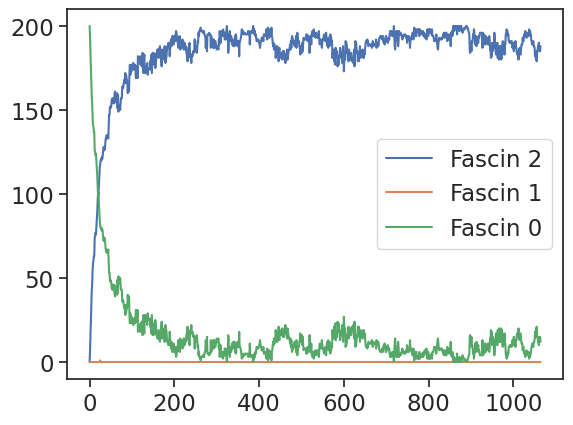

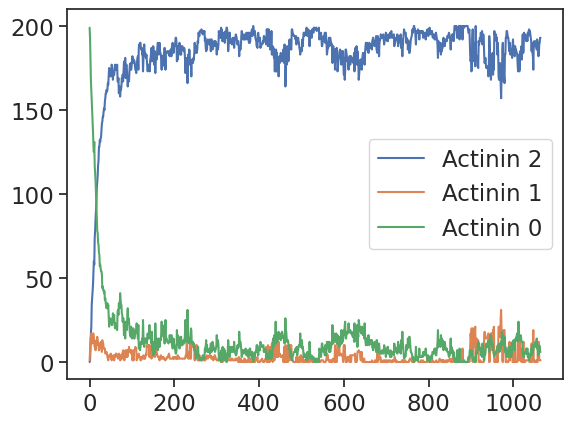

In [147]:
fascin_binding_data.plot()
actinin_binding_data.plot()

In [128]:
{2:(fascin_binding_heads==2).sum(),
 1:(fascin_binding_heads==1).sum(),
 0:(fascin_binding_heads==0).sum()}

{2: 190, 1: 0, 0: 10}

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,4865.830107,4883.896889,4126.078052,4136.793583,4077.519128,4062.692476,4516.652833,4511.730558,4683.297936,4675.305673,...,1624.411987,1608.655196,5909.222142,5913.611278,3307.148091,3330.252198,4517.269861,4522.651555,2594.133365,2609.934363
1,4840.516771,4858.443189,4113.021546,4124.020965,4068.954943,4054.443326,4503.593453,4498.402367,4666.722498,4659.067028,...,1614.107723,1599.043638,5946.875828,5951.018867,3317.787457,3340.985812,4509.652957,4514.707768,2581.434506,2596.758704
2,4826.670069,4844.823177,4066.320173,4077.102399,4018.845587,4004.096433,4456.901683,4451.917392,4622.897189,4614.967261,...,1569.458587,1554.012742,5937.593256,5941.990700,3328.846322,3352.016635,4458.808182,4464.102660,2542.986289,2558.601037
3,4779.578648,4797.548894,4072.301049,4083.469471,4029.082993,4014.503509,4460.278325,4455.249722,4626.540427,4618.949409,...,1557.699760,1542.486391,6000.150857,6004.403580,3289.448119,3312.698181,4467.841595,4472.749246,2521.209332,2536.584845
4,4780.548278,4798.727715,4012.941605,4023.891269,3967.792769,3953.183845,4403.035612,4397.954855,4568.077117,4560.307523,...,1517.586183,1502.567793,5979.134476,5983.483668,3342.848213,3366.095933,4407.825509,4412.928969,2492.354705,2507.693841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,4574.428666,4593.651472,917.296054,904.657527,963.179457,979.419488,581.538309,584.604284,536.820278,526.958080,...,3596.731660,3615.613376,8916.352535,8923.917993,6922.790990,6941.715348,551.281499,541.883206,3178.974564,3165.536040
1956,4539.969646,4559.005912,923.236013,912.081044,987.860482,1004.783776,569.587277,571.749952,507.078733,500.044603,...,3604.310509,3623.451563,8961.452130,8968.890146,6924.852078,6943.767951,583.866505,572.008732,3175.905010,3162.019520
1957,4581.476290,4600.547877,973.808359,961.741158,1023.481978,1039.605301,623.920696,627.574009,575.149688,567.222475,...,3649.288803,3668.205631,8976.654993,8984.233728,6964.604040,6983.446763,605.533535,595.630067,3220.375248,3206.750316
1958,4517.508627,4536.485046,960.148289,949.588942,1023.263288,1039.460791,587.639895,591.814776,553.223778,547.149147,...,3626.597978,3645.670492,9009.340664,9016.867151,6929.851910,6948.642722,603.962414,591.601986,3182.932538,3168.968002


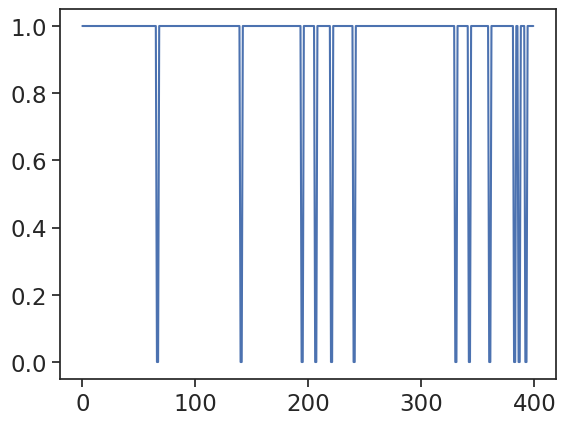

In [62]:
#plt.figure(figsize=(40,40))
#sns.heatmap(averaged_distance < 50)
plt.plot(np.any(averaged_distance < 50, axis=0))
pd.DataFrame(averaged_distance)

In [119]:
def count_contacts(averaged_distance):
    num_columns = averaged_distance.shape[1]
    num_contacts = num_columns // 2
    contacts = np.zeros(num_contacts)

    for i in range(num_contacts):
        start_col = 2 * i
        distances = averaged_distance[:, start_col:start_col + 2]
        num_close_contacts = np.sum(np.any(distances < 50, axis=0))
        contacts[i] = num_close_contacts

    return contacts

# Example usage:
# Assuming you have loaded your table into a numpy array called 'averaged_distance'
output = count_contacts(averaged_distance)
print(output)
    
    

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.
 2. 0. 2. 2. 0. 2. 2. 2.]


In [114]:
np.any(averaged_distance<50,axis=0).reshape(-1,2).sum(axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 2])

In [92]:
def count_contacts(averaged_distance):
    num_columns = averaged_distance.shape[1]
    num_contacts = num_columns // 2
    contacts = np.zeros(num_contacts)

    for i in range(num_contacts):
        start_col = 2 * i
        distances = averaged_distance[:, start_col:start_col + 2]
        num_close_contacts = np.sum(np.any(distances < 50, axis=1))
        contacts[i] = num_close_contacts

    return contacts

# Example usage:
# Assuming you have loaded your table into a numpy array called 'averaged_distance'
output = count_contacts(averaged_distance)
print(output)

ValueError: could not broadcast input array from shape (196000,) into shape (200,)

In [121]:
num_particles = averaged_distance.shape[0]
num_columns = averaged_distance.shape[1]
num_contacts = num_columns // 2
contacts = np.zeros(num_contacts)
range(num_contacts)
averaged_distance[:, 4:6].shape

for i in range(num_contacts):
    start_col = 2 * i
    distances = averaged_distance[:, start_col:start_col + 2]
    num_close_contacts = np.sum(np.any(distances < 50, axis=0))
    contacts[i] = num_close_contacts

contacts

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2.])

In [123]:
np.any(distances < 50, axis=1)

array([False, False, False, ..., False, False, False])

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,4865.830107,4883.896889,4126.078052,4136.793583,4077.519128,4062.692476,4516.652833,4511.730558,4683.297936,4675.305673,...,1624.411987,1608.655196,5909.222142,5913.611278,3307.148091,3330.252198,4517.269861,4522.651555,2594.133365,2609.934363
1,4840.516771,4858.443189,4113.021546,4124.020965,4068.954943,4054.443326,4503.593453,4498.402367,4666.722498,4659.067028,...,1614.107723,1599.043638,5946.875828,5951.018867,3317.787457,3340.985812,4509.652957,4514.707768,2581.434506,2596.758704
2,4826.670069,4844.823177,4066.320173,4077.102399,4018.845587,4004.096433,4456.901683,4451.917392,4622.897189,4614.967261,...,1569.458587,1554.012742,5937.593256,5941.990700,3328.846322,3352.016635,4458.808182,4464.102660,2542.986289,2558.601037
3,4779.578648,4797.548894,4072.301049,4083.469471,4029.082993,4014.503509,4460.278325,4455.249722,4626.540427,4618.949409,...,1557.699760,1542.486391,6000.150857,6004.403580,3289.448119,3312.698181,4467.841595,4472.749246,2521.209332,2536.584845
4,4780.548278,4798.727715,4012.941605,4023.891269,3967.792769,3953.183845,4403.035612,4397.954855,4568.077117,4560.307523,...,1517.586183,1502.567793,5979.134476,5983.483668,3342.848213,3366.095933,4407.825509,4412.928969,2492.354705,2507.693841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,4574.428666,4593.651472,917.296054,904.657527,963.179457,979.419488,581.538309,584.604284,536.820278,526.958080,...,3596.731660,3615.613376,8916.352535,8923.917993,6922.790990,6941.715348,551.281499,541.883206,3178.974564,3165.536040
1956,4539.969646,4559.005912,923.236013,912.081044,987.860482,1004.783776,569.587277,571.749952,507.078733,500.044603,...,3604.310509,3623.451563,8961.452130,8968.890146,6924.852078,6943.767951,583.866505,572.008732,3175.905010,3162.019520
1957,4581.476290,4600.547877,973.808359,961.741158,1023.481978,1039.605301,623.920696,627.574009,575.149688,567.222475,...,3649.288803,3668.205631,8976.654993,8984.233728,6964.604040,6983.446763,605.533535,595.630067,3220.375248,3206.750316
1958,4517.508627,4536.485046,960.148289,949.588942,1023.263288,1039.460791,587.639895,591.814776,553.223778,547.149147,...,3626.597978,3645.670492,9009.340664,9016.867151,6929.851910,6948.642722,603.962414,591.601986,3182.932538,3168.968002


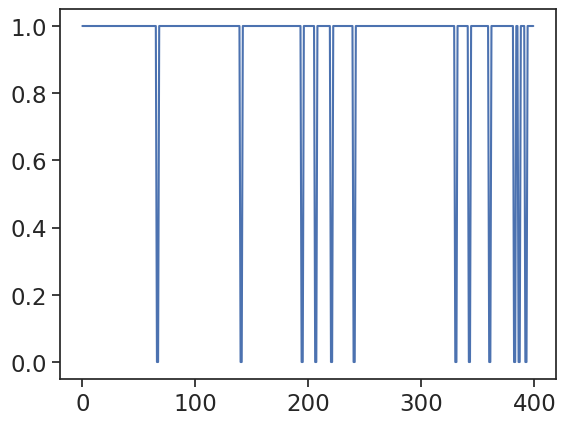

In [75]:
#plt.figure(figsize=(40,40))
#sns.heatmap(averaged_distance < 50)
plt.plot(np.any(averaged_distance < 50, axis=0))
pd.DataFrame(averaged_distance)

In [73]:
averaged_distance[1000]

array([ 6042.86141338,  6060.73773663,  3347.71992473,  3331.86688158,
        3254.42484822,  3256.66843679,  3029.75508297,  3045.56798679,
        3118.00956542,  3107.6654422 ,  8255.55398406,  8247.38817604,
        8035.43398102,  8040.88309271, 10929.50523098, 10934.05757053,
        5942.34219967,  5938.74524027,  6419.80110823,  6406.43580843,
       11466.6571346 , 11483.00930563,  2041.42490727,  2032.14242304,
        9381.16428997,  9363.95538982,  9020.67939959,  9024.20815705,
        6021.06141551,  6015.35358533,  6814.68254201,  6834.96202993,
        7674.17668434,  7658.26883078,  9285.0569199 ,  9299.79037656,
        6460.48053715,  6464.05100614,  9279.25035313,  9260.25420755,
        6876.08174511,  6884.52583142,  5777.77849572,  5800.8693192 ,
        7789.94043061,  7786.737103  ,  7930.41214978,  7912.32054651,
        1361.72086306,  1354.96904641,  5978.80205046,  5960.30966481,
        5502.04206891,  5485.61748442,  3966.49956711,  3953.02377494,
      

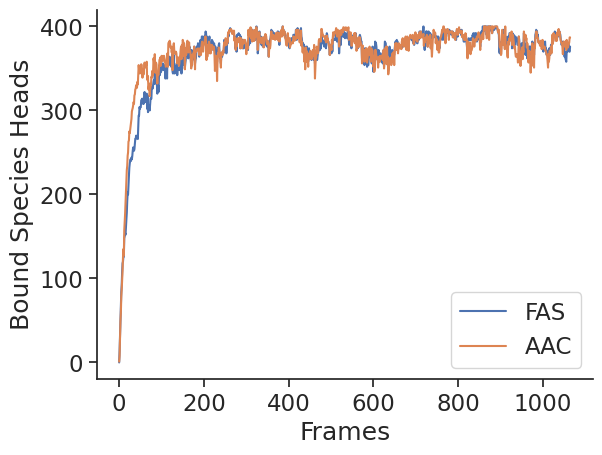

In [148]:
sns.set(style='ticks',font_scale=1.5)
plt.plot(connected_fascin_counts,label='FAS')
plt.plot(connected_aac_counts,label='AAC')
plt.legend()
plt.xlabel('Frames')
plt.ylabel('Bound Species Heads')
sns.despine()


<Axes: >

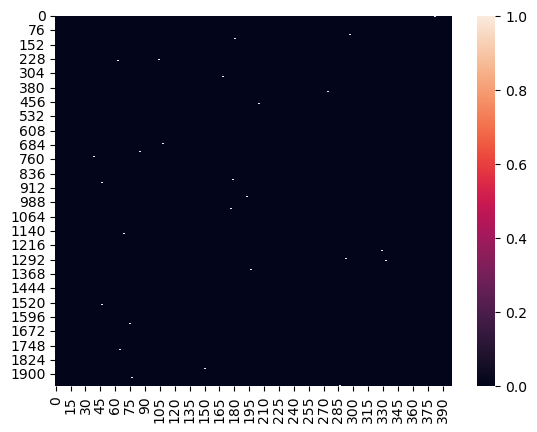

In [165]:
sns.heatmap(averaged_distance<50)